In [3]:
pip install pandas numpy matplotlib seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('sample2.csv.gz')

In [12]:
# Check basic Information

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65061 entries, 0 to 65060
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   issue_url                 65061 non-null  object
 1   issue_label               65061 non-null  object
 2   issue_created_at          65061 non-null  object
 3   issue_author_association  65061 non-null  object
 4   repository_url            65061 non-null  object
 5   issue_title               65061 non-null  object
 6   issue_body                58562 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None
                                                issue_url issue_label  \
count                                               65061       65061   
unique                                              64807           3   
top     https://api.github.com/repos/iftg7n/Test/issues/8         bug   
freq                                                    6       32499

# Analyze Potential Fairness and Risk Factors

Missing Data Analysis

In [19]:
# check for missing values

print(data.isnull().sum())
print("\n")

missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

issue_url                      0
issue_label                    0
issue_created_at               0
issue_author_association       0
repository_url                 0
issue_title                    0
issue_body                  6499
dtype: int64


issue_url                   0.000000
issue_label                 0.000000
issue_created_at            0.000000
issue_author_association    0.000000
repository_url              0.000000
issue_title                 0.000000
issue_body                  9.989087
dtype: float64


Imbalance in Categorical Variables

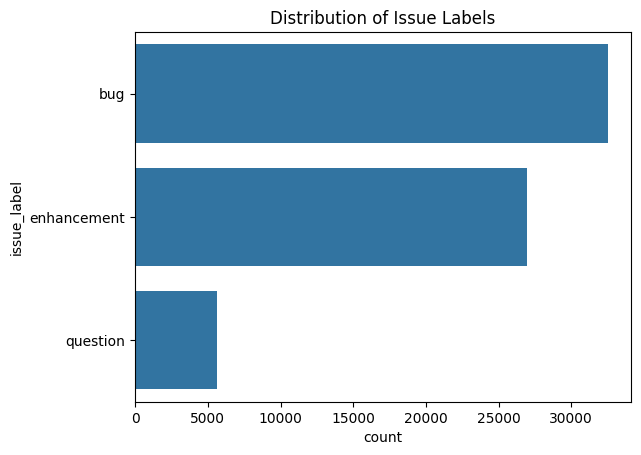

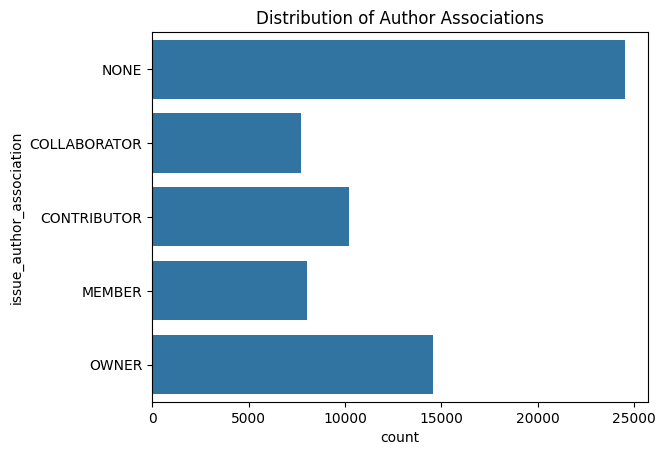

In [20]:
sns.countplot(data['issue_label'])
plt.title('Distribution of Issue Labels')
plt.show()

sns.countplot(data['issue_author_association'])
plt.title('Distribution of Author Associations')
plt.show()

Temporal Patterns

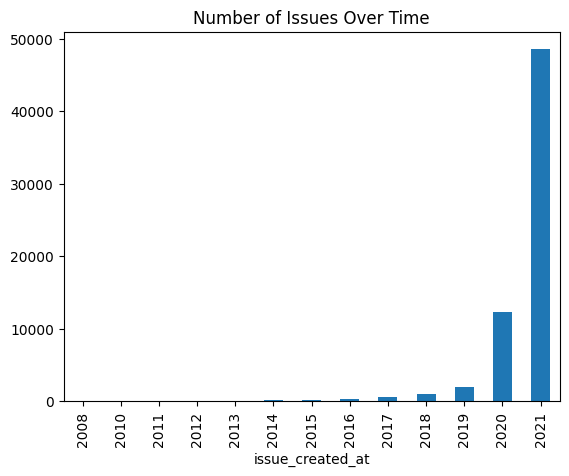

In [21]:
data['issue_created_at'] = pd.to_datetime(data['issue_created_at'])
data['issue_created_at'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Issues Over Time')
plt.show()

Text Data Analysis

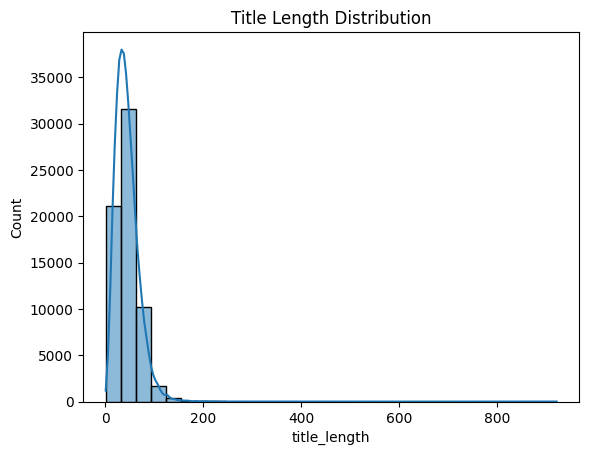

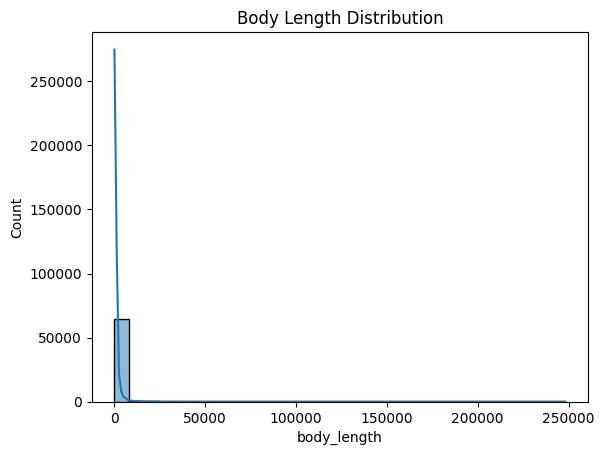

In [22]:
data['title_length'] = data['issue_title'].str.len()
data['body_length'] = data['issue_body'].fillna('').str.len()

sns.histplot(data['title_length'], bins=30, kde=True)
plt.title('Title Length Distribution')
plt.show()

sns.histplot(data['body_length'], bins=30, kde=True)
plt.title('Body Length Distribution')
plt.show()


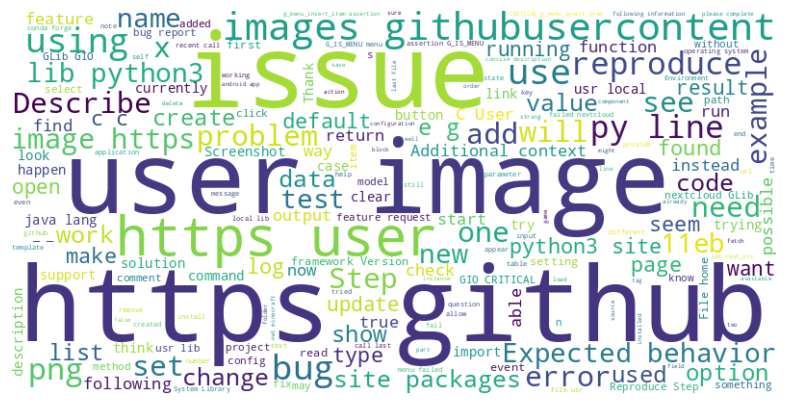

In [34]:
from wordcloud import WordCloud

text = ' '.join(data['issue_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

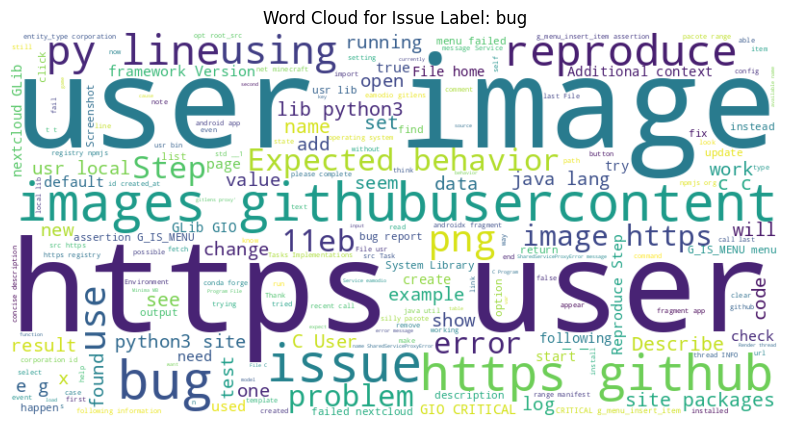

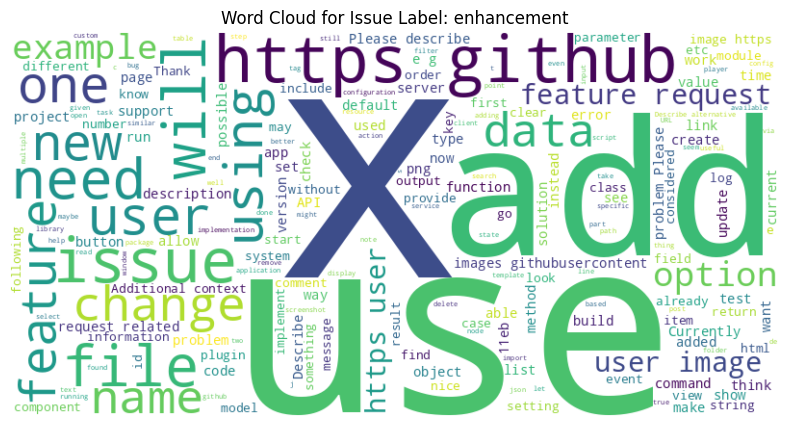

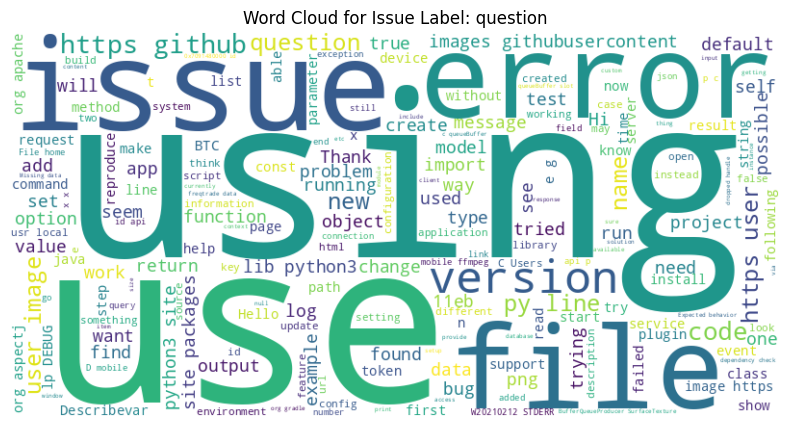

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Iterate through each unique issue_label
for label in data['issue_label'].unique():
    # Combine all issue_body text for the current label
    text = ' '.join(data[data['issue_label'] == label]['issue_body'].dropna())

    # Generate a word cloud for the current label
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Issue Label: {label}')
    plt.axis('off')
    plt.show()


In [26]:
duplicate_count = data.duplicated(subset=['issue_url', 'issue_title']).sum()
print(f'Number of duplicate entries: {duplicate_count}')

Number of duplicate entries: 228
